# Twitter Analysis - University comparison

------------

In [98]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
from IPython.core.display import display, HTML
import pandas as pd
%reload_ext autoreload
%autoreload 1
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('max_colwidth',100)    

display(HTML("<style>.container { width:100% !important; }</style>"))

import sys
import matplotlib.pyplot as plt
import seaborn as sns
import re
import json
from itertools import combinations, takewhile
import collections
import pandas as pd
import numpy as np
import os

from simhash import Simhash, SimhashIndex

sns.set()

from Utils.UtilsViz import *
# from Utils.UtilsGeoViz import *

In [99]:
os.getcwd()

'D:\\Dev\\Sources\\Projects\\GitProjects\\BigDataEngg\\final_project'

In [100]:
# fpath = os.path.join(os.getcwd(), "temp.csv")
# fpath = os.path.join(os.getcwd(), "temp2.csv")
fpath = os.path.join(os.getcwd(), "all_uni_data.csv")
tweets_df = pd.read_csv(fpath, index_col="Unnamed: 0", nrows=1e6)
display(
    tweets_df.shape,
    tweets_df.head()
)

(1000000, 23)

,coordinates,created_at,entities_hashtags,favorite_count,favorited,id_str,in_reply_to_status_id_str,in_reply_to_user_id_str,place_country,place_country_code,place_name,place_type,retweet_count,retweeted,retweeted_status_user_id_str,retweeted_status_user_name,text,user_favorites_count,user_followers_count,user_friends_count,user_id_str,user_name,user_statuses_count
0,NaN,2017-06-22 23:16:53,[],0.0,False,8.780290e+17,NaN,NaN,NaN,NaN,NaN,NaN,0.0,False,3.366467e+08,John McGonigal,RT @jmcgonigal9: Penn State student section tickets sold out in 89 minutes\r\n\r\nhttps://t.co/K...,132.0,3.0,44.0,7.740459e+17,David Kononchuk,130.0
1,NaN,2017-06-22 23:17:13,"[{'indices': [112, 115], 'text': 'Wx'}]",0.0,False,8.780291e+17,NaN,NaN,NaN,NaN,NaN,NaN,0.0,False,NaN,NaN,...A SIGNIFICANT WEATHER ADVISORY HAS BEEN ISSUED UNTIL 630 PM CDT FOR... Northwestern Marshall ...,0.0,602.0,607.0,8.881816e+08,AmericaAlerts App,85724.0
2,NaN,2017-06-22 23:17:47,[],0.0,False,8.780293e+17,NaN,NaN,NaN,NaN,NaN,NaN,0.0,False,NaN,NaN,Inspired by this innovative wave 4 forming whole students that @CSUDH is riding &amp; stoking w/...,693.0,875.0,1221.0,2.363593e+09,Giacomo,3086.0
3,NaN,2017-06-22 23:17:53,[],0.0,False,8.780293e+17,NaN,NaN,NaN,NaN,NaN,NaN,0.0,False,7.091099e+17,David Eccles,RT @gringene_bio: @Big3BioSF @OmicsOmicsBlog @Stanford @PacBio If you're making DNA look like it...,5796.0,1047.0,1054.0,1.204189e+08,Samuel Lampa,9391.0
4,NaN,2017-06-22 23:17:56,[],0.0,False,8.780293e+17,8.780287e+17,1.244408e+09,NaN,NaN,NaN,NaN,0.0,False,NaN,NaN,@SheWhoVotes He went to Northwestern Law School? ðŸ˜‚ jk ðŸ—¿,1189.0,85.0,107.0,7.011908e+17,Janna Propaganda,3328.0


## Clean up the hashtags

In [103]:
def clean_hashtags(row):
    try:
        if row == "[]":
            return []
        if row is None:
            return []
        if row is np.NaN:
            return []
        if (len(row) == 0):
            return []
        tags = []
    #     for item in row:
    #         tags.append(item.text)
        s = row.replace("\'", "\"")
        d = json.loads(s)
        for item in d:
            tags.append(item["text"])
        return tags
    except Exception as e:
#         print("Exception caught : ", e, "for row\n\t", row)
        return []
    
    
tweets_df["hashtags_cleaned"] = tweets_df["entities_hashtags"].apply(clean_hashtags)

# from ast import literal_eval

# def le(row):
#     if (row is np.NaN) or (row is np.nan):
#         return []
#     elif row is None:
#         return []
#     elif type(row) == type(1.0):
#         return []
#     else:
#         try:
#             return literal_eval(row)
#         except Exception as e:
# #             print("Exception caught!", e)
# #             print(row, type(row))
#             return []

# tweets_df['hashtags_cleaned']=tweets_df['hashtags_cleaned'].apply(le)

Exception caught :  'int' object is not iterable for row
	 231
Exception caught :  Invalid \escape: line 1 column 35 (char 34) for row
	 [{'indices': [21, 30], 'text': 'ìº\xa0í�¼ìŠ¤ë‚´ì´�ê¸°íœ´ëŒ€'}, {'indices': [31, 41], 'text': 'ì\xa0�ì\xa0�ê°€ê¹Œì›Œì§€ëŠ”ëŠ�ë‚Œ'}, {'indices': [42, 51], 'text': 'í•™ìƒ�ë“¤í”¼í•´ì—†ì–´ì•¼'}]
Exception caught :  'int' object is not iterable for row
	 910
Exception caught :  'int' object is not iterable for row
	 191
Exception caught :  Invalid \escape: line 1 column 42 (char 41) for row
	 [{'indices': [86, 105], 'text': 'antologÃ\xadagaussiana'}, {'indices': [106, 114], 'text': 'ciencia'}]
Exception caught :  'int' object is not iterable for row
	 3079
Exception caught :  'int' object is not iterable for row
	 3079
Exception caught :  'int' object is not iterable for row
	 960
Exception caught :  'int' object is not iterable for row
	 1204
Exception caught :  'int' object is not iterable for row
	 210
Exception caught :  'int' object is not iterable for

Exception caught :  'int' object is not iterable for row
	 399
Exception caught :  'int' object is not iterable for row
	 4311
Exception caught :  'int' object is not iterable for row
	 2278
Exception caught :  Invalid \escape: line 1 column 121 (char 120) for row
	 [{'indices': [22, 32], 'text': 'FOLLOWERS'}, {'indices': [64, 72], 'text': 'skybuli'}, {'indices': [73, 77], 'text': 'í•\xa0ë¡œìœˆ'}, {'indices': [78, 91], 'text': 'Northwestern'}]
Exception caught :  'int' object is not iterable for row
	 4721
Exception caught :  'int' object is not iterable for row
	 2387
Exception caught :  'int' object is not iterable for row
	 1026
Exception caught :  'int' object is not iterable for row
	 4721
Exception caught :  'int' object is not iterable for row
	 1026
Exception caught :  'int' object is not iterable for row
	 2387
Exception caught :  'int' object is not iterable for row
	 571
Exception caught :  'int' object is not iterable for row
	 974
Exception caught :  'int' object is not it

In [104]:
tweets_df["text"].fillna(value="", inplace=True)
tweets_df["text_len"] = tweets_df["text"].apply(len)

# Q1 - Identify tweets related to UChicago and 3-4 universities of your choice

In [105]:
uc_favored_tags = ["uchicago", "uchearing", "universityofchicago", "pritzkerschoolofmedicine",
                   "uofc", "maroonmade", "chicagobooth"]
nw_favored_tags = ["northwestern"]
upenn_favored_tags = ["upenn", "penn", "uofpenn", "universityofpennsylvania", "pennlaw", "upennhearing"]
uic_favored_tags = ["UIC", "UICProud"]
mit_favored_tags = ["MIT"]
stanford_favored_tags = ["stanford"]

def is_stanford_tweet(row):
    if row is np.NaN:
        return False
    for ftag in stanford_favored_tags:
        for tag in row:
            if ftag.lower() in tag.lower():
                return True
    return False

def is_upenn_tweet(row):
    if row is np.NaN:
        return False
    for ftag in upenn_favored_tags:
        for tag in row:
            if ftag.lower() in tag.lower():
                return True
    return False

def is_nw_tweet(row):
    if row is np.NaN:
        return False
    for ftag in nw_favored_tags:
        for tag in row:
            if ftag.lower() == tag.lower():
                return True
    return False

def is_uc_tweet(row):
    if row is np.NaN:
        return False
    for ftag in uc_favored_tags:
        for tag in row:
            if ftag.lower() in tag.lower():
                return True
    return False

def is_uic_tweet(row):
    if row is np.NaN:
        return False
    for ftag in uic_favored_tags:
        for tag in row:
            if ftag.lower() == tag.lower():
                return True
    return False

def is_mit_tweet(row):
    if row is np.NaN:
        return False
    for ftag in mit_favored_tags:
        for tag in row:
            if ftag.lower() == tag.lower():
                return True
    return False

tweets_df["mit_tweet"] = tweets_df["hashtags_cleaned"].apply(is_mit_tweet)
tweets_df["stanford_tweet"] = tweets_df["hashtags_cleaned"].apply(is_stanford_tweet)
tweets_df["nw_tweet"] = tweets_df["hashtags_cleaned"].apply(is_nw_tweet)
tweets_df["upenn_tweet"] = tweets_df["hashtags_cleaned"].apply(is_upenn_tweet)
tweets_df["uc_tweet"] = tweets_df["hashtags_cleaned"].apply(is_uc_tweet)
tweets_df["uic_tweet"] = tweets_df["hashtags_cleaned"].apply(is_uic_tweet)

cols = ["uc_tweet", "uic_tweet", "mit_tweet", "stanford_tweet", "upenn_tweet", "nw_tweet"]

def is_uni_tweet(row):
    for col in cols:
        if row[col]:
            return True
    else:
        return False

tweets_df["uni_tweet"] = tweets_df[cols].apply(is_uni_tweet, axis=1)

def is_uni_tweet2(row):
    for col in cols:
        if row[col]:
            return col[0:-6]
    else:
        return ""

tweets_df["uni_tweet_name"] = tweets_df[cols].apply(is_uni_tweet2, axis=1)

Make a subset data set that only picks tweets related to universities we're analysing.

In [106]:
uni_df = tweets_df[(tweets_df["uni_tweet"]==True)]

Let's just quickly make a Time dimension for ease of use later on.

In [107]:
uni_df["created_at"] = pd.to_datetime(uni_df['created_at'])

In [108]:
uni_df['created_month'] = uni_df['created_at'].map(lambda x: x.month)
uni_df['created_year'] = uni_df['created_at'].map(lambda x: x.year)
uni_df['created_date'] = uni_df['created_at'].map(lambda x: x.day)
uni_df['created_dayofweek'] = uni_df['created_at'].map(lambda x: x.weekday_name)

In [109]:
uni_df.shape

(55822, 37)

# Q2 - Identify the most prolific / influential Twitterers
1. By message volume
1. By message retweet
1. How much are they tweeting about the Universities vs. other topics? 

Can we identify Retweets?

In [110]:
uni_df["retweeted_status_user_id_str"].count()

29091

## Most active users

In [111]:
user_grp = uni_df[["id_str", "user_id_str", "user_name"]].groupby(by=["user_name"], as_index=False).count()
user_grp.reset_index(drop=True, inplace=True)
user_grp.sort_values(by="id_str", inplace=True, ascending=False)
user_grp.head()

,user_name,id_str,user_id_str
17828,Northwestern Spyder,1587,1587
22168,Stanford SportSpyder,957,957
24363,UChicago,460,460
17162,NUMBSpiritLeader,425,425
16652,Miranda C. Bell,372,372


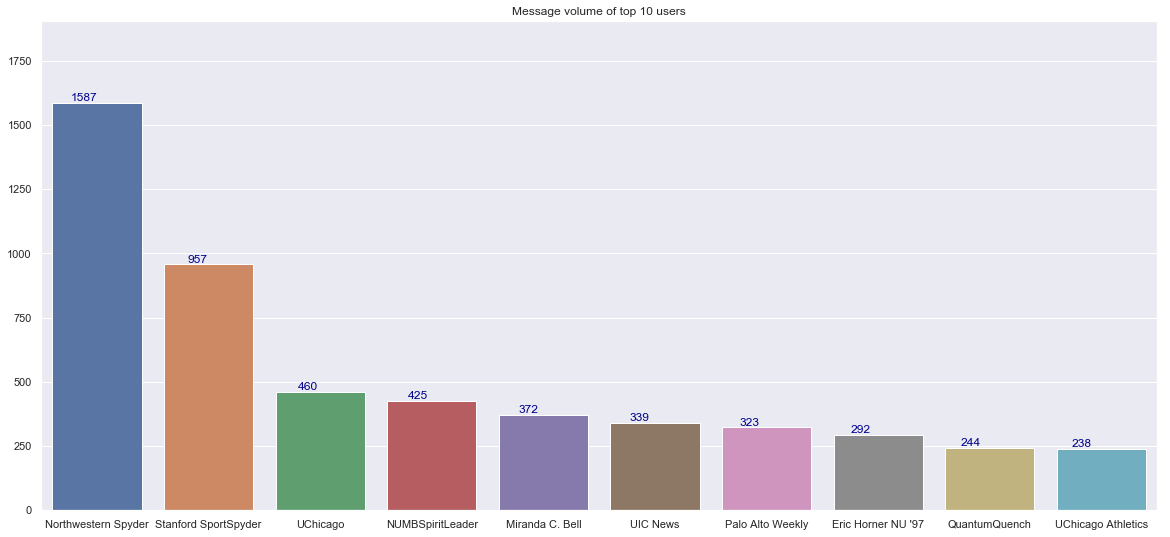

In [112]:
user_subset = user_grp.iloc[:10,:]
user_subset.reset_index(drop=True, inplace=True)
f, ax = plt.subplots(1, 1, figsize=(20,9))
plot_bar(data=user_subset, x="user_name", y="id_str", ax=ax, title="Message volume of top 10 users", highlight_max_min=False)

### How much are they tweeting about the Universities vs. other topics?

In [113]:
user_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
user_name      10 non-null object
id_str         10 non-null int64
user_id_str    10 non-null int64
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes


In [114]:
prolific_users = user_subset["user_name"].unique()

In [115]:
cols = ["id_str", "user_id_str", "text", "user_name", "hashtags_cleaned", "uc_tweet", "uic_tweet", "mit_tweet", "stanford_tweet", "upenn_tweet", "nw_tweet", "uni_tweet"]
uvnu_df = tweets_df[tweets_df["user_name"].isin(prolific_users)][cols]
def tmpfun(row):
    if row:
        return 1
    else:
        return 0
uvnu_df["uni_tweet"] = uvnu_df["uni_tweet"].apply(tmpfun)
uvnu_df.shape

(6399, 12)

In [116]:
tmp_df = uvnu_df[["user_name", "uni_tweet"]].groupby(by="user_name", as_index=False).agg(["sum", "count"])
tmp_df.columns = ["uni_tweets", "total_tweets"]
tmp_df.reset_index(drop=False, inplace=True)
tmp_df["ratio"] = tmp_df["uni_tweets"] / tmp_df["total_tweets"]
tmp_df

,user_name,uni_tweets,total_tweets,ratio
0,Eric Horner NU '97,292,297,0.983165
1,Miranda C. Bell,372,377,0.986737
2,NUMBSpiritLeader,425,425,1.000000
3,Northwestern Spyder,1587,1589,0.998741
4,Palo Alto Weekly,323,339,0.952802
5,QuantumQuench,244,333,0.732733
6,Stanford SportSpyder,957,963,0.993769
7,UChicago,460,892,0.515695
8,UChicago Athletics,238,753,0.316069
9,UIC News,339,431,0.786543


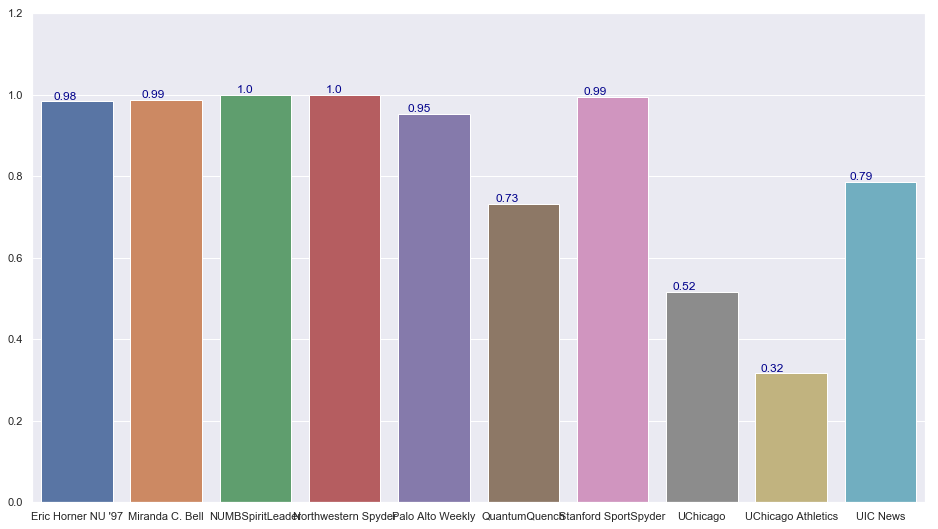

In [117]:
f, ax = plt.subplots(1,1,figsize=(16,9))
plot_bar(data=tmp_df, x="user_name", y="ratio", ax=ax, highlight_max_min=False)

### Message Retweet

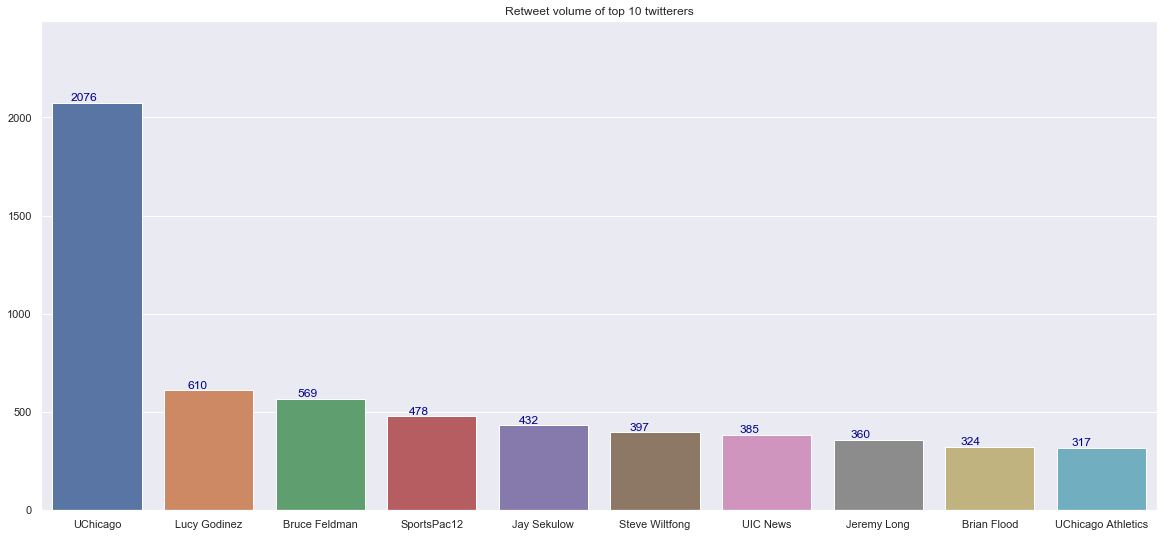

In [118]:
user_rt_grp = uni_df[["id_str", "retweeted_status_user_name"]].groupby(by=["retweeted_status_user_name"], as_index=False).count()
user_rt_grp.reset_index(drop=True, inplace=True)
user_rt_grp.sort_values(by="id_str", inplace=True, ascending=False)

user_subset = user_rt_grp.iloc[:10,:]
user_subset.reset_index(drop=True, inplace=True)
f, ax = plt.subplots(1, 1, figsize=(20,9))
plot_bar(data=user_subset, x="retweeted_status_user_name", y="id_str", ax=ax, title="Retweet volume of top 10 twitterers", highlight_max_min=False)

## Where are these Twitterers located?
-  For UChicago
-  For other universities
-  Do you see any relationship between university locations and Twitterers’ locations?
-  Visualize the relationships

In [119]:
places_df = uni_df[["id_str", "user_name", "place_country", "place_country_code", "place_name", "place_type", "uni_tweet_name"]].dropna()
places_df.head()

,id_str,user_name,place_country,place_country_code,place_name,place_type,uni_tweet_name
856,8.989279e+17,TMJ-KYL Sales Jobs,United States,US,Stanford,city,stanford
860,8.989286e+17,Guckenheimer Careers,United States,US,Stanford,city,stanford
892,8.989315e+17,Guckenheimer Careers,United States,US,Stanford,city,stanford
918,8.989350e+17,HumMigraineResearchU,United States,US,Iris & B. Gerald Cantor Center for Visual Arts,poi,stanford
946,8.989386e+17,Graham McComiskie,United States,US,Philadelphia,city,upenn


In [120]:
def get_top5_places(dfs):
    return dfs.value_counts().iloc[:5].index

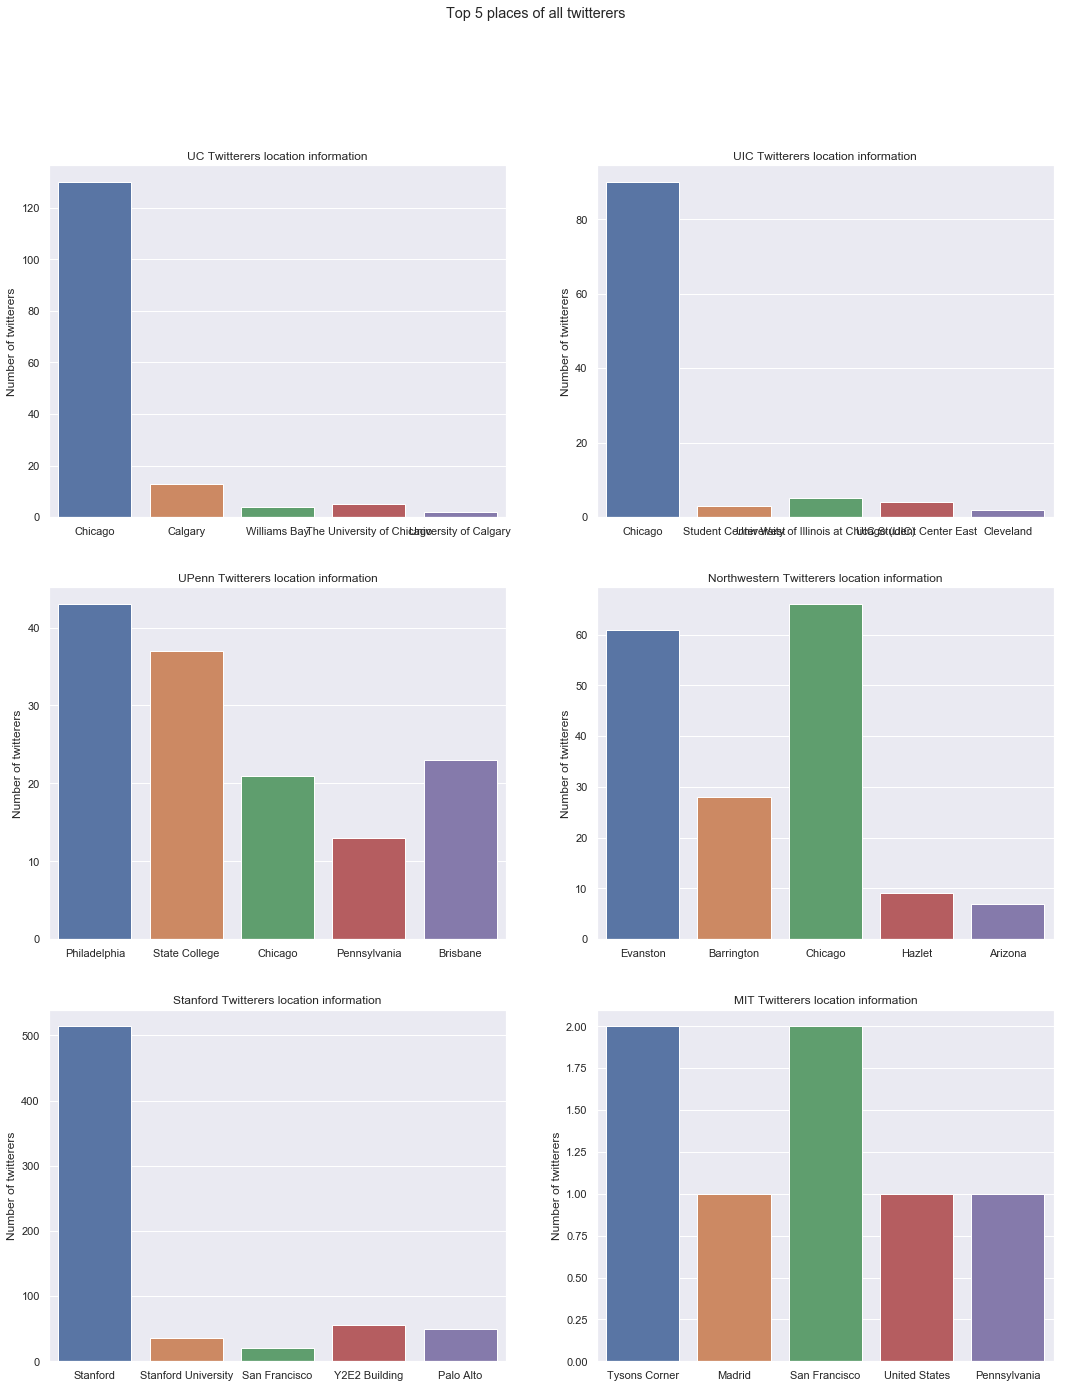

In [121]:
uc_places_df = places_df[places_df["uni_tweet_name"]=="uc"]
upenn_places_df = places_df[places_df["uni_tweet_name"]=="upenn"]
uic_places_df = places_df[places_df["uni_tweet_name"]=="uic"]
nw_places_df = places_df[places_df["uni_tweet_name"]=="nw"]
stanford_places_df = places_df[places_df["uni_tweet_name"]=="stanford"]
mit_places_df = places_df[places_df["uni_tweet_name"]=="mit"]

# Just use the top 5 places
uc_places_df = uc_places_df[uc_places_df["place_name"].isin(get_top5_places(uc_places_df["place_name"]))]
upenn_places_df = upenn_places_df[upenn_places_df["place_name"].isin(get_top5_places(upenn_places_df["place_name"]))]
uic_places_df = uic_places_df[uic_places_df["place_name"].isin(get_top5_places(uic_places_df["place_name"]))]
nw_places_df = nw_places_df[nw_places_df["place_name"].isin(get_top5_places(nw_places_df["place_name"]))]
stanford_places_df = stanford_places_df[stanford_places_df["place_name"].isin(get_top5_places(stanford_places_df["place_name"]))]
mit_places_df = mit_places_df[mit_places_df["place_name"].isin(get_top5_places(mit_places_df["place_name"]))]

f, ax = plt.subplots(3, 2,figsize=(18, 22))

g = sns.countplot(x="place_name", data=uc_places_df, ax=ax[0][0])
t = ax[0][0].set(title="UC Twitterers location information", ylabel="Number of twitterers", xlabel="")
t = g.set_xticklabels(g.get_xticklabels(), rotation=0)

g = sns.countplot(x="place_name", data=uic_places_df, ax=ax[0][1])
t = ax[0][1].set(title="UIC Twitterers location information", ylabel="Number of twitterers", xlabel="")

g = sns.countplot(x="place_name", data=upenn_places_df, ax=ax[1][0])
t = ax[1][0].set(title="UPenn Twitterers location information", ylabel="Number of twitterers", xlabel="")

g = sns.countplot(x="place_name", data=nw_places_df, ax=ax[1][1])
t = ax[1][1].set(title="Northwestern Twitterers location information", ylabel="Number of twitterers", xlabel="")

g = sns.countplot(x="place_name", data=stanford_places_df, ax=ax[2][0])
t = ax[2][0].set(title="Stanford Twitterers location information", ylabel="Number of twitterers", xlabel="")

g = sns.countplot(x="place_name", data=mit_places_df, ax=ax[2][1])
t = ax[2][1].set(title="MIT Twitterers location information", ylabel="Number of twitterers", xlabel="")

st = plt.suptitle("Top 5 places of all twitterers")


## What distinguishes University of Chicago Twitterers vs Twitterers who tweet about other universities
Visualize the trends

In [137]:
rt_uni_df[["retweeted_status_user_id_str", "is_retweet"]].head(1000)

,retweeted_status_user_id_str,is_retweet
41,NaN,True
65,2.219998e+09,True
90,1.669025e+08,True
92,NaN,True
106,2.497918e+09,True
107,NaN,True
124,2.026782e+08,True
127,1.104434e+09,True
130,1.099596e+08,True
138,1.099596e+08,True


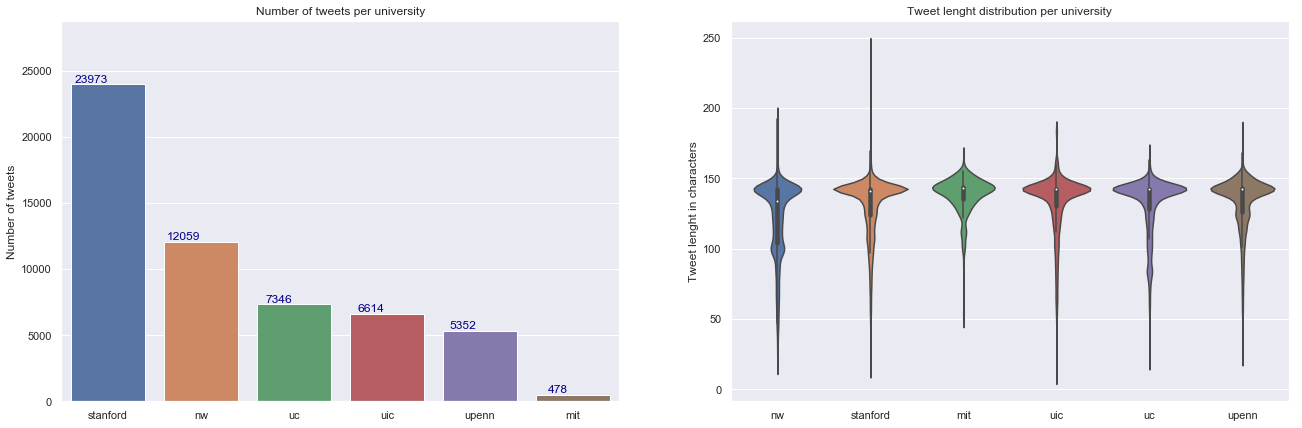

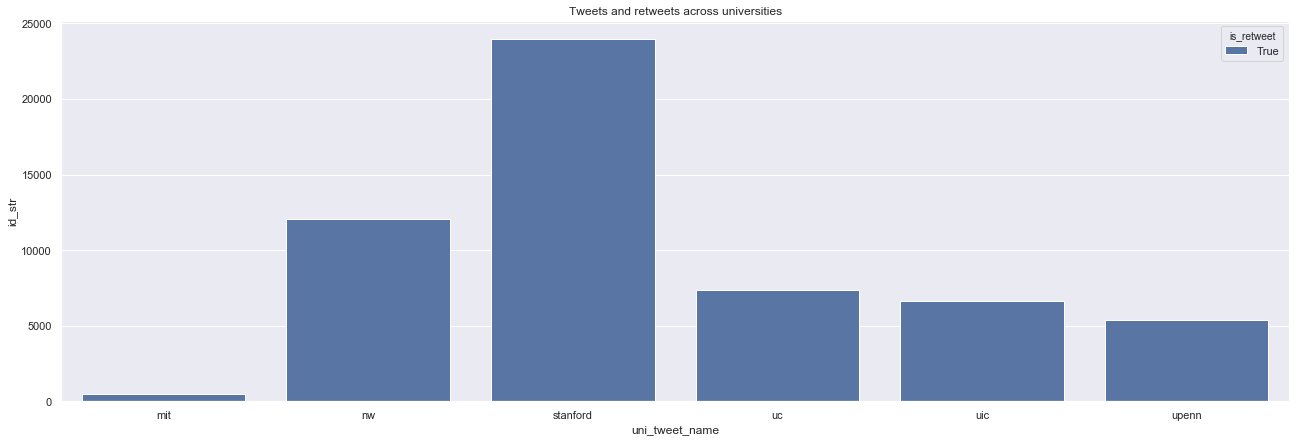

In [136]:
f, ax = plt.subplots(1,2,figsize=(22,7))

uni_counts = uni_df["uni_tweet_name"].value_counts().to_frame()
uni_counts.reset_index(drop=False, inplace=True)
uni_counts.columns = ["university", "num_tweets"]
plot_bar(x="university", y="num_tweets", data=uni_counts, ax=ax[0], highlight_max_min=False,
        title="Number of tweets per university", ylabel="Number of tweets")

sns.violinplot(data=uni_df, x="uni_tweet_name", y="text_len", ax=ax[1] )
t = ax[1].set(title="Tweet lenght distribution per university", ylabel="Tweet lenght in characters", xlabel="")

rt_uni_df = uni_df[["id_str", "retweeted_status_user_id_str", "uni_tweet_name"]]
def is_retweet(row):
    if str(row).lower() == "nan":
        return False
    else:
        return True
# rt_uni_df["is_retweet"] = rt_uni_df["retweeted_status_user_id_str"].apply(lambda x: True if x is not np.NaN else False)
rt_uni_df["is_retweet"] = rt_uni_df["retweeted_status_user_id_str"].apply(is_retweet)

rt_uni_grp = rt_uni_df.groupby(["uni_tweet_name", "is_retweet"], as_index=False).count()

f, ax = plt.subplots(1, 1, figsize=(22, 7))
g = sns.barplot(x="uni_tweet_name", y="id_str", hue="is_retweet", data=rt_uni_grp, ax=ax)
t = g.set(title="Tweets and retweets across universities")

## What are the timelines of these tweets? Do you see significant peaks and valleys?
Do you see data collection gaps?

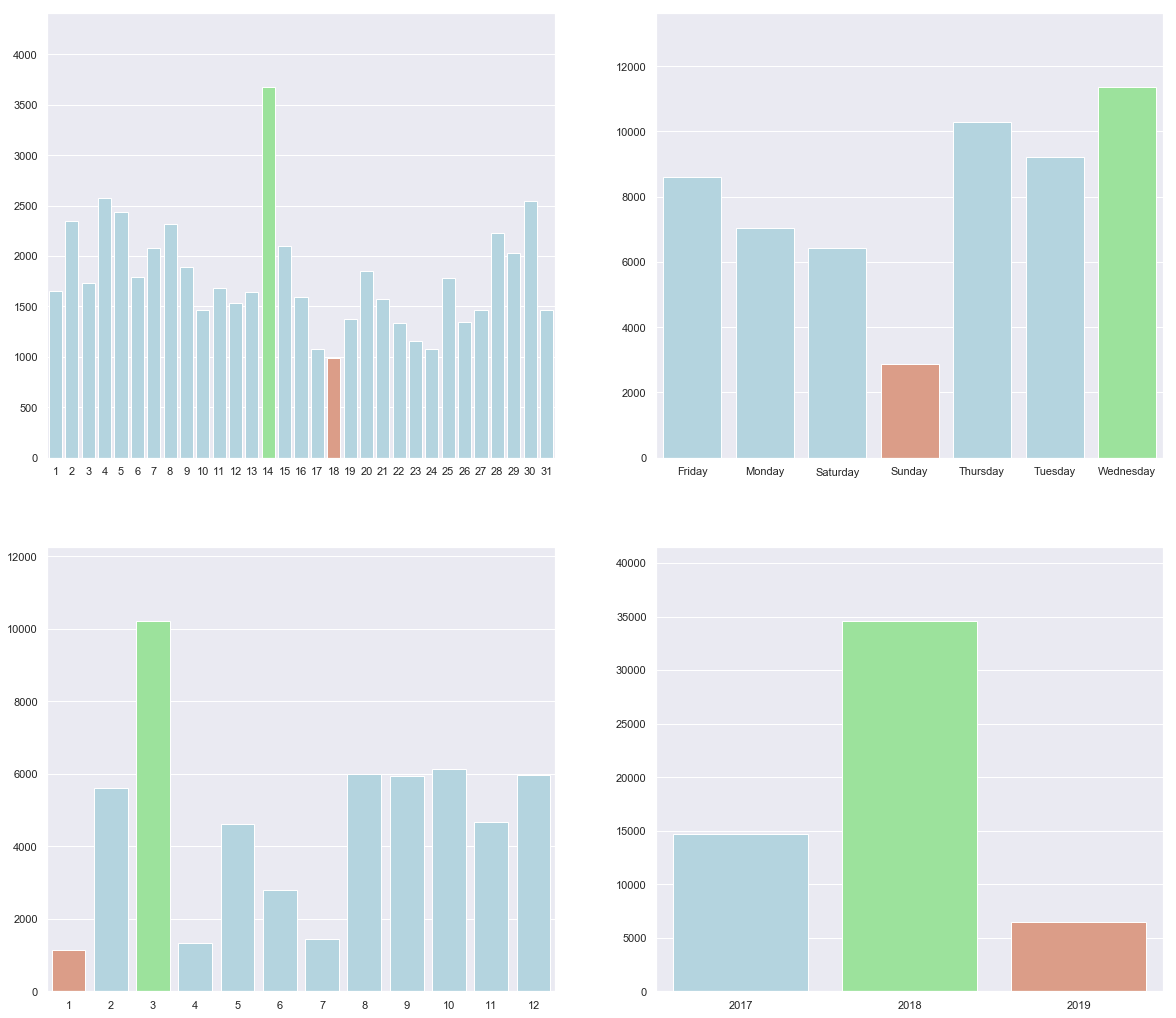

In [123]:
uni_df_date_grp = uni_df[["id_str", "created_date"]].groupby(by="created_date", as_index=False).count()
uni_df_dayofweek_grp = uni_df[["id_str", "created_dayofweek"]].groupby(by="created_dayofweek", as_index=False).count()
uni_df_month_grp = uni_df[["id_str", "created_month"]].groupby(by="created_month", as_index=False).count()
uni_df_year_grp = uni_df[["id_str", "created_year"]].groupby(by="created_year", as_index=False).count()

f, ax = plt.subplots(2,2,figsize=(20,18))
plot_bar(data=uni_df_date_grp, x="created_date", y="id_str", ax=ax[0][0], annot=False)
plot_bar(data=uni_df_dayofweek_grp, x="created_dayofweek", y="id_str", ax=ax[0][1], annot=False)
plot_bar(data=uni_df_month_grp, x="created_month", y="id_str", ax=ax[1][0], annot=False)
plot_bar(data=uni_df_year_grp, x="created_year", y="id_str", ax=ax[1][1], annot=False)

## How unique are the messages for each of these universities?
-  Are they mostly unique? Or mostly people are just copy-pasting the same text?
-  You can use something like Jaccard similarity / Cosine Similarity / Simhash / Minhash to measure uniqueness / similarity
-  Visualize message duplication (for each university – not between the universities)

In [124]:
tweets_df["text"].head()

0    RT @jmcgonigal9: Penn State student section tickets sold out in 89 minutes\r\n\r\nhttps://t.co/K...
1    ...A SIGNIFICANT WEATHER ADVISORY HAS BEEN ISSUED UNTIL 630 PM CDT FOR... Northwestern Marshall ...
2    Inspired by this innovative wave 4 forming whole students that @CSUDH is riding &amp; stoking w/...
3    RT @gringene_bio: @Big3BioSF @OmicsOmicsBlog @Stanford @PacBio If you're making DNA look like it...
4                                          @SheWhoVotes He went to Northwestern Law School? ðŸ˜‚ jk ðŸ—¿
Name: text, dtype: object

We will need to remove all the Re-tweets to ensure we aren't inordinately biased towards some tweets.

In [125]:
rows_to_drop = uni_df[~uni_df["retweeted_status_user_id_str"].isna()].index
# Drop all the rows with retweets
unique_uni_tweets_df = uni_df.drop(rows_to_drop, axis=0)

In [126]:
uc_tweets = unique_uni_tweets_df[unique_uni_tweets_df["uc_tweet"]==True]["text"]
uic_tweets = unique_uni_tweets_df[unique_uni_tweets_df["uic_tweet"]==True]["text"]
upenn_tweets = unique_uni_tweets_df[unique_uni_tweets_df["upenn_tweet"]==True]["text"]
nw_tweets = unique_uni_tweets_df[unique_uni_tweets_df["nw_tweet"]==True]["text"]
stanford_tweets = unique_uni_tweets_df[unique_uni_tweets_df["stanford_tweet"]==True]["text"]
mit_tweets = unique_uni_tweets_df[unique_uni_tweets_df["mit_tweet"]==True]["text"]

Some helper functions

In [127]:
def get_features(s):
    width = 3
    s = s.lower()
    s = re.sub(r'[^\w]+', '', s)
    return [s[i:i + width] for i in range(max(len(s) - width + 1, 1))]

def get_ratios(df):
    data = df.to_dict()
    objs = [(str(k), Simhash(get_features(v))) for k, v in data.items()]
    index = SimhashIndex(objs, k=3)
    list_all = []
    for i in range(0,len(data)):
        s1 = list(data.values())[i]
        s2 = Simhash(get_features(s1))
        list_all.append(len(index.get_near_dups(s2)))
    a = [0 if i == 1 else 1 for i in list_all]
    duplicate = sum(a)
    unique = len(a)-sum(a)
    return duplicate, unique

In [128]:
uc_dup, uc_unique = get_ratios(uc_tweets)
uic_dup, uic_unique = get_ratios(uic_tweets)
upenn_dup, upenn_unique = get_ratios(upenn_tweets)
nw_dup, nw_unique = get_ratios(nw_tweets)
stanford_dup, stanford_unique = get_ratios(stanford_tweets)
mit_dup, mit_unique = get_ratios(mit_tweets)

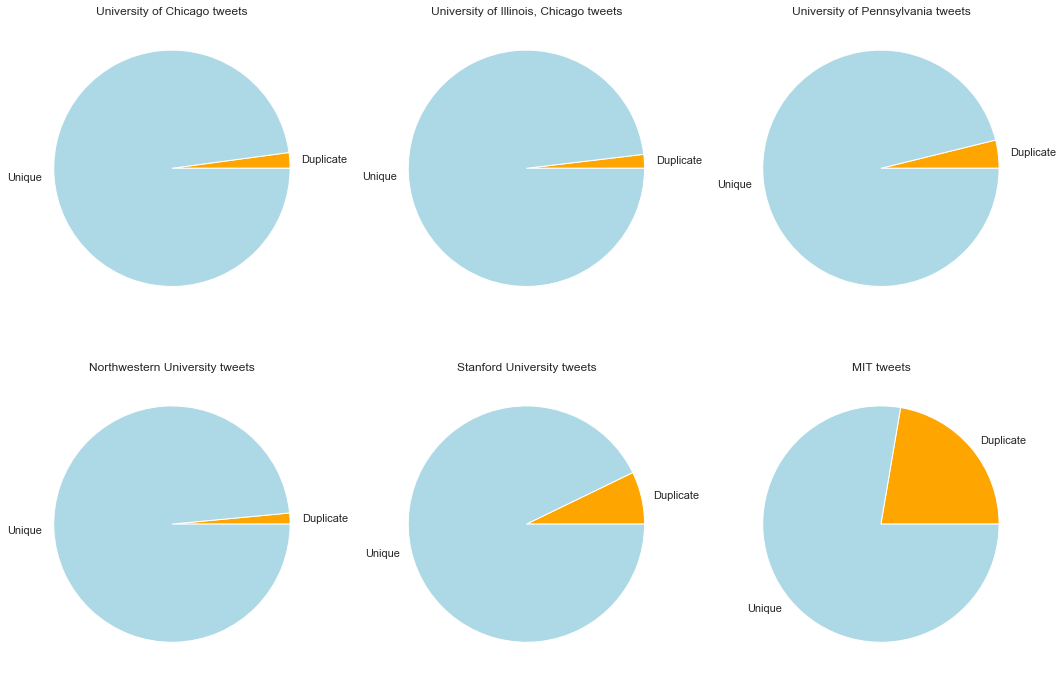

In [129]:
def plot_pie(values, labels, colors, ax):
    ax.pie(x=values, labels=labels, colors=colors)

labels = ['Duplicate', 'Unique']
colors = ['orange','lightblue']
f, ax = plt.subplots(2, 3, figsize=(18, 12))
plot_pie(values=[uc_dup, uc_unique], labels=labels, colors=colors, ax=ax[0][0])
ax[0][0].set(title="University of Chicago tweets")

plot_pie(values=[uic_dup, uic_unique], labels=labels, colors=colors, ax=ax[0][1])
ax[0][1].set(title="University of Illinois, Chicago tweets")

plot_pie(values=[upenn_dup, upenn_unique], labels=labels, colors=colors, ax=ax[0][2])
ax[0][2].set(title="University of Pennsylvania tweets")

plot_pie(values=[nw_dup, nw_unique], labels=labels, colors=colors, ax=ax[1][0])
ax[1][0].set(title="Northwestern University tweets")

plot_pie(values=[stanford_dup, stanford_unique], labels=labels, colors=colors, ax=ax[1][1])
ax[1][1].set(title="Stanford University tweets")

plot_pie(values=[mit_dup, mit_unique], labels=labels, colors=colors, ax=ax[1][2])
t = ax[1][2].set(title="MIT tweets")

